# Covid-19 Overview
## This blog is a summary of the cases and deaths of each state in India  
- Author: M J Niegil Francis

Covid19 cases have exponentially grown in India since the first 100 cases on ```14th March 2020``` and tracking covid19 in India is a difficult task because of India's population. 

Even the most popular dashboard by [Johns Hopkins](https://coronavirus.jhu.edu/map.html) only covers data for India at the national level. 


In [195]:
#hide
## Import essential packages below
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline


#Loading the appropriate data from covid19india.org
data = pd.read_csv("https://api.covid19india.org/csv/latest/states.csv")


#Removing unassigned states from the data 
df = data[data['State'] != 'State Unassigned']

#Removing unnecessary columns
df=df[['Date','State','Confirmed','Recovered','Deceased']]


#Getting a list of all dates
dates=list(set(df.Date))
dates.sort()

#Getting a list of all States
states=list(set(df.State))

#Findingtodays date
dt_tday=dates[-1]
#Finding yesterdays date
dt_yday=dates[-2]

#Getting todays data for all states available
dfc=df[df['Date']==dt_tday]


#Removing columns for concatenating compatibility
dfc=dfc.drop(['Date'],axis=1).reset_index(drop=True)

#Renaming the Columns
dfc.columns=['State','Cases','Recovered','Deaths']


#Getting yesterdays data for all states available
dfp=df[df['Date']==dt_yday]

#Removing columns for concatenating compatibility
dfp=dfp.drop(['State','Date'],axis=1).reset_index(drop=True)

#Renaming the columns
dfp.columns=['PCases','PRecovered','PDeaths']

#Creating a new table with todays and yesterdays data statewise
df_table=pd.concat([dfc,dfp],axis=1)

#Arranging the columns 
df_table=df_table.sort_values(by=['Cases','Deaths'], ascending=[False, False])

#Adding new columns with number of new cases,deaths and recovered individuals since yesterday 
for c in 'Cases, Deaths, Recovered'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)
df_table['Recovery Rate'] = (100* df_table['Recovered']/ df_table['Cases']).round(2)

India=df_table.iloc[0] # Gathering India's information

#Removing India from the list of states
df_new=df_table[1:]
df_new=df_new.reset_index(drop=True)

In [196]:
#hide_input
summary={'updated':dt_tday,'since':dt_yday,'Cases':India['Cases'],'PCases':India['PCases'],'Deaths':India['Deaths'],'PDeaths':India['PDeaths'],'Cases (+)':India['Cases (+)'],'Deaths (+)':India['Deaths (+)'],'Recovered':India['Recovered'],'Recovered (+)':India['Recovered (+)']}


overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #0000ff; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
<p style="text-align: center;">Recovered:</p>
<p style="text-align: center;font-size:24px;">{recovered} (<span style="color: #ff0000;">+{rnew}</span>)</p>
'''

# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']
recovered= summary['Recovered']
rnew= summary['Recovered (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew, recovered=recovered,rnew=rnew))

display(html)

In [197]:
#hide
#Dataframe to store the top five states with the highest cases including India's cases
day_data={}
for i in df_table['State'].iloc[:6]:
    temp=df[df['State']==i]
    day_data[f'{i} date']=temp['Date']
    day_data[f'{i} cases']=temp[['Confirmed']].diff(axis=0).fillna(0).astype(int)

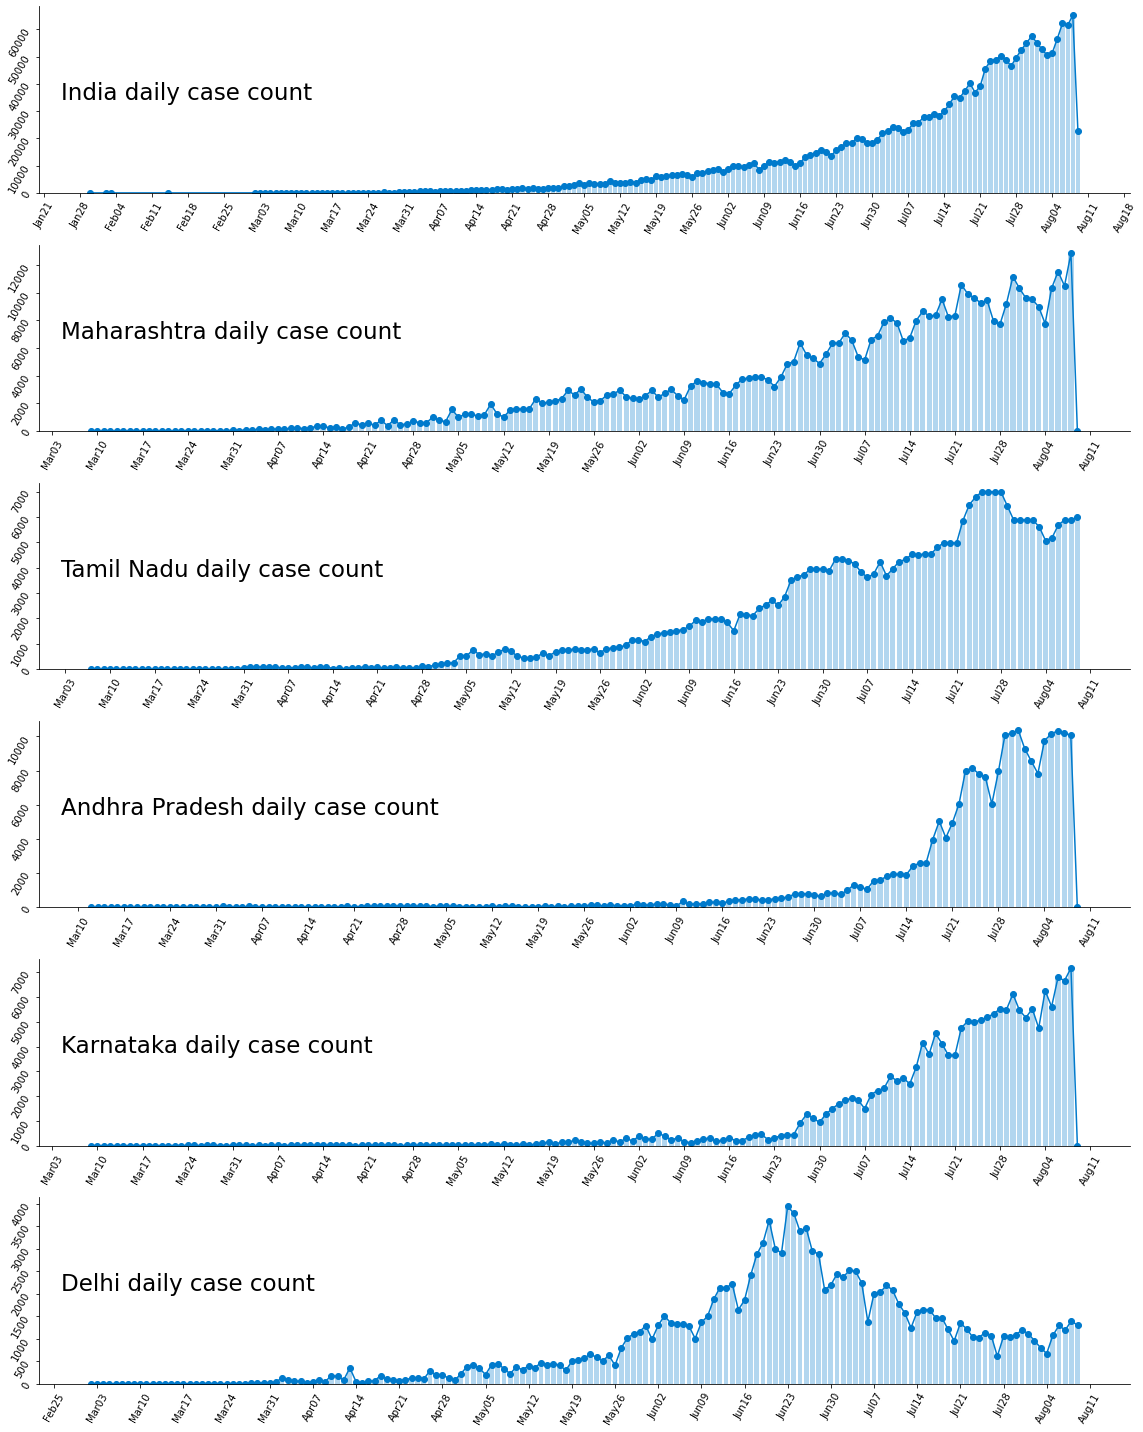

In [198]:
#hide_input

n = 6
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n, 3)
for i in range(n):
    ef=pd.DataFrame()
    j=df_table['State'].iloc[i]
    ef['date']=day_data[f'{j} date'].astype('datetime64[ns]')
    ef['Total']=day_data[f'{j} cases']
    
    ax.append(fig.add_subplot(gs[i,:]))

    ax[i].bar(ef.date,ef.Total,color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.Total,marker='o',color='#007acc')
    
    ax[i].text(0.02,0.5,f'{j} daily case count',transform = ax[i].transAxes, fontsize = 23);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    ax[i].tick_params(rotation=60)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [199]:
#hide_input
print(df_new.to_string(index=False))

                                    State   Cases  Recovered  Deaths  PCases  PRecovered  PDeaths  Cases (+)  Deaths (+)  Recovered (+)  Fatality Rate  Recovery Rate
                              Maharashtra  503084     338362   17367  503084      338362    17367          0           0              0           3.45          67.26
                               Tamil Nadu  296901     238638    4927  290907      232618     4808       5994         119           6020           1.66          80.38
                           Andhra Pradesh  217040     129615    1939  217040      129615     1939          0           0              0           0.89          59.72
                                Karnataka  172102      89238    3091  172102       89238     3091          0           0              0           1.80          51.85
                                    Delhi  145427     130587    4111  144127      129362     4098       1300          13           1225           2.83          89.80
    